# k-NN analysis, Summary of Assignment

In this assignment, we will investigate how the **k-nearest neighbor-algorithm works**. The purpose is to:
<ul><li>train a k-NN classifier on two given datasets</li><li>investigate how increasing $k$ affects the performance of the classifier</li><li>and the relationship between the training error and the test error.</li></ul>

For each dataset, the questions that you must answer in your report are listed below. You should run the entire procedure twice. 
<ul><li>Once using a test set of **33%**</li><li>once using a test set of **66%**</li></ul>

Describe the results and how they relate to the terms under-/overfitting.

<ol><li>For the given dataset, what seems to be an optimal k value? Are there more than one? If so, which should you choose?</li>
<li>What type of learning is this? (Super-/unsupervised or reinforcement learning, multiclass, regression or ranking, etc.)</li>
<li>Based on your plots, describe the relationship between the training and test error.</li></ol>

In addition to this, you should choose:
<ul><li>two out of the four features in the Iris dataset</li>
<li>10 out of the 30 features in the breast cancer dataset to use in your experiments.</li></ul>

It does not need to be the two features that makes for the best predictors but it is encouraged for you to find these two. **You should investigate $k$ values up to 30**.

It is not necessary that you produce the best classifier possible, but that you experiment with the classifier to understand the concepts. If you are unable to answer the question on finding an optimal value k (i.e., if the classifier never seems to perform well), reason as to why this might be. The same thing applies to the other questions.


## The datasets

You will perform experiments on two datasets; the Iris dataset, and a breast cancer dataset. The datasets differ in the size and the number of features. This can lead to different answers to the questions (i.e., do not expect the k value to be the same for each dataset).

### Iris
The Iris dataset contains data on three classes of flowers. There are 150 samples, where each sample has 4 features related to the petal and sepal length/width.

You can read more about it on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

### Breast cancer
The breast cancer dataset contains data from patient diagnostic situations, where each data point is either a case of cancer or not. There are 569 samples, where each sample has 30 features related to the structure of cell nuclei such as radius, smoothness et c.
You can read more about it on [Sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).


## What to hand in

Your report should contain a title page with the names and user names (``@cs``) of all group members, course name, course code, and a fancy title for your assignment. This report is not a full fledge report (i.e., you do not need to write long-winding introductions, or follow the general report structure), but you should clearly answer the assignment questions and present your results in a structured way.

Upload your report to **Labres** as a **PDF**, and **all code** used to produce your results (i.e., your adjusted copy of this notebook) as a ZIP file.

#### import all dependencies we need for this assignment:

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
import matplotlib.pyplot as plt
import numpy as np

#### Implement a k-NN training function and **properly document the function signature**:

In [2]:
def train_knn(x_train, y_train, k):
    """
    Given training data (input and output), train a k-NN classifier.

    Input:    x/y_train - Two arrays of equal length, one with input data and 
              one with the correct labels. 
              k - number of neighbors considered when training the classifier.
    Returns:  The trained classifier
    """
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(x_train, y_train)
    return knn

#### Implement knn evaluation function:

In [3]:
def evaluate_knn(knn, x_train, y_train, x_test, y_test):
    """
    Given a trained classifier, its training data, and test data, calculate
    the accuracy on the training and test sets.
    
    Input:    knn - A trained k-nn classifier
              x/y_train - Training data
              x/y_test  - Test data
    
    Returns:  A tuple (train_acc, test_acc) with the resulting accuracies,
              obtained when using the classifier on the given data.
    """
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    return (train_score, test_score)

#### Load a dataset (Iris or Breast Cancer)

In [4]:
def load_dataset(name, features, test_size, random_state):
    """
    Loads the iris or breast cancer datasets with the given features and 
    train/test ratio.
    
    Input:    name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
    Returns:  Arrays x_train, x_test, y_train, y_test that correspond to the
              training/test sets.
    """
    # Load the dataset
    if name == "iris":
        dataset = load_iris()
    elif name == "breastcancer":
        dataset = load_breast_cancer()
    #print(dataset)
    #print(dataset["feature_names"])
    #print(dataset["target_names"])
    
    #print('You are using the features:')
    #for x in features:
    #    print(x,"-", dataset.feature_names[x])
    
    X = dataset.data[:,features]
    Y = dataset.target
    
    # Split the dataset into a training and a test set
    return train_test_split(X, Y, test_size=test_size, random_state=random_state)

In [5]:
def train_and_evaluate(dataset_name, features, test_size, k_max, random_state):
    """
    Controller for loading dataset with selected features, training and evaluating the kclasifier, 
    and returning their scores for specified number of k values
    
    Input:    dataset_name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
              k_max = Maximum number of k neighbors to evaluate a classifier for
    Returns:  Arrays train_scores and test_scores that correspond to the scores for 
              the evaluated test and train sets, the index of each element is the value of
              k that the data was scored on.
    """
    
    # Load specified dataset and split into test/train
    x_train, x_test, y_train, y_test = load_dataset(dataset_name,features, test_size, random_state)


    # Let's create some list to save the results in:
    train_scores = []
    test_scores = []

    # For odd values ranging from 1 to k_max, create and train a kclasifier, evaluate the
    # score the test and train set, then append the scores to coressponding lists
    for i in range(1,k_max,2):
        knn = train_knn(x_train, y_train, i)
        knn_eval = evaluate_knn(knn, x_train, y_train, x_test, y_test)
        train_scores.append(knn_eval[0])
        test_scores.append(knn_eval[1])
    
    # return the lists of train and test scores for this data/parameter configuration
    return train_scores, test_scores


def plot_dataset_results(dataset_name, features, test_size, train_scores, test_scores, k_max):
    """
    Takes the inputs and plots the data. The parameters are noted in the title of the plot
    
    Input:    dataset_name - Either "iris" or "breastcancer"
              features - An array with the indicies of the features to load
              test_size - How large part of the dataset to be used as test data.
                          0.33 would give a test set 33% of the total size.
              train_scores, test_scores - the scores of the classifier being evaluated
              for each corresponding set, the length of each list is approx half the size of
              k_max (since it is the odd numbers from 1 to k_max)
              k_max = Maximum number of k neighbors to evaluate a classifier for
    """
    # Put the parameters in the title of the plot for convenience
    plt.title('KNN results - ' + dataset_name + " - " + str(test_size) + " - " + str(len(features)) + " features")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy')
    
    # Force the ticks on the x axis to match the values of k and not to skip any ticks
    k_vals = np.arange(1, k_max,2)
    plt.xticks(k_vals)
    
    # Create x-axis
    #xaxis = [x for x in range(1,k_max,2)]
    
    # Plot the test and training scores with labels
    plt.plot(k_vals, train_scores, label='Training score')
    plt.plot(k_vals, test_scores, label='Test score')

    # Show the figure
    plt.legend()
    plt.show()


You can see here that we have higher accuracy from using all 4 features:

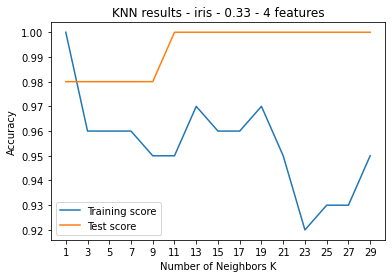

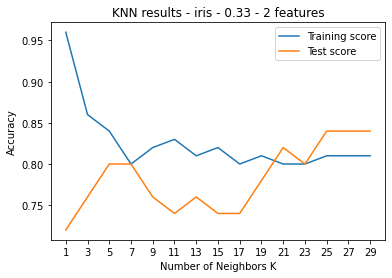

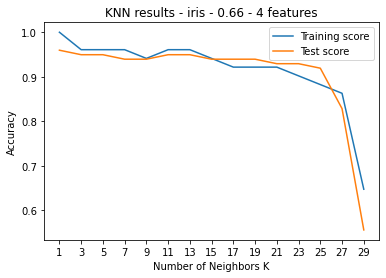

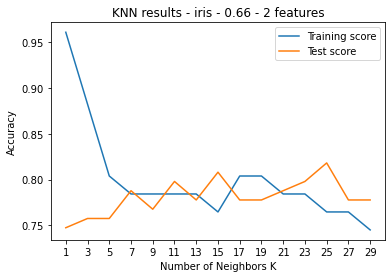

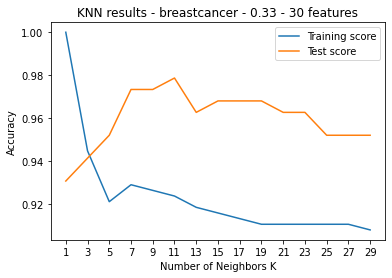

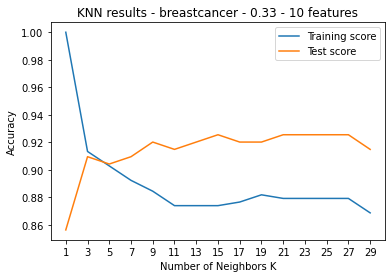

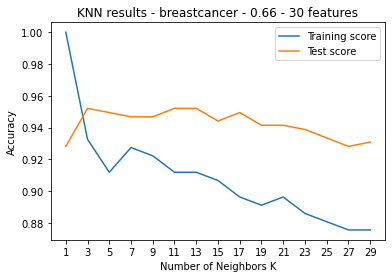

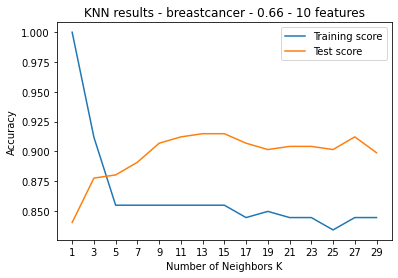

In [12]:
# Create a list of all parameter combinations will run the classifier on
params = [("iris",[0,1,2,3], .33),
          ("iris",[0,1], .33),
          ("iris",[0,1,2,3], .66),
          ("iris",[0,1], .66),
          ("breastcancer",np.arange(30), .33),
          ("breastcancer",np.arange(10), .33),
          ("breastcancer",np.arange(30), .66),
          ("breastcancer",np.arange(10), .66)]

# Store all the results
results = []

# set vars
k_max=30
random_state=42

# Iterate through each parameter combination
for p in params:
    
    # Load data, train classifer, evaluate score
    results.append( train_and_evaluate(*p, k_max=k_max, random_state=random_state))
    
    # Plot results
    plot_dataset_results(*p,*results[-1], k_max=k_max)

